## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [14]:
data=pd.read_csv("data.csv")

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
data.shape

(614, 13)

In [17]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# drop all rows containing nan values
#TODO: use imputing instead of simply dropping
data.dropna(inplace=True)

In [22]:
print('------Property_Area--------')
print(data['Property_Area'].value_counts(),'\n')

print('------Education--------')
print(data['Education'].value_counts(),'\n')

print('------Gender--------')
print(data['Gender'].value_counts(),'\n')

print('------Married--------')
print(data['Married'].value_counts(),'\n')

print('------Dependents--------')
print(data['Dependents'].value_counts(),'\n')

print('------Self_Employed--------')
print(data['Self_Employed'].value_counts(),'\n')

------Property_Area--------
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64 

------Education--------
Graduate        383
Not Graduate     97
Name: Education, dtype: int64 

------Gender--------
Male      394
Female     86
Name: Gender, dtype: int64 

------Married--------
Yes    311
No     169
Name: Married, dtype: int64 

------Dependents--------
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64 

------Self_Employed--------
No     414
Yes     66
Name: Self_Employed, dtype: int64 



In [23]:
?plt.pie

<AxesSubplot:ylabel='Gender'>

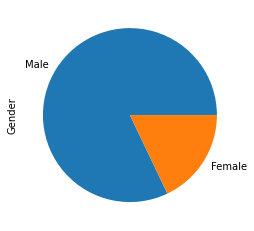

In [24]:
data['Gender'].value_counts().plot(kind='pie')

(array([236., 202.,  30.,   6.,   6.]),
 array([  9. , 127.2, 245.4, 363.6, 481.8, 600. ]),
 <BarContainer object of 5 artists>)

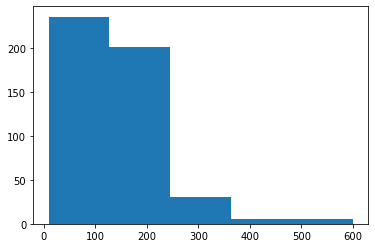

In [25]:
plt.hist(data['LoanAmount'],bins=5)

In [26]:
#TODO: more plots to understand data
#TODO: Preprocess data

In [27]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
replacements={
    'Loan_Status':{'N':0,'Y':1},
    'Self_Employed':{'Yes':1,'No':0},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Married':{'Yes':1,'No':0},
}
data.replace(replacements,inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1
